# ¡Hola, Gelber!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola Gelber, has logrado aprobar el proyecto 2! felicidades!
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

convertiremos los 5 archivos csv en dataframe. debemos tener atencion en el separador ; que hay en cada archivo .cvs ya que este separador interfiere en el dataframe. hace que no sea clara la informacion.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


In [3]:
display(instacart_orders.head())
instacart_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(products.head())
print(products.info())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
display(aisles.head())
print(aisles.info())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
display(departments.head())
print(departments.info())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
display(order_products.head())
print(order_products.info(show_counts=True))

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Al realizar el respectivo dataframe para las 5 archivos csv, podemos observar que los archivos venian con ";" de separador. por tal razon debimos utilizar `.sep=';'` para los 5 Dataframe. con este separador podemos ver mas ordenado cada archivo. por otro lado podemos obervar que el Dataframe order_products es el que mas filas tiene. por tal razon utilizamos `.info(show_counts=True))` para mostrar los non-null que contiene este dataframe.
Los dataframe donde hay nombres de productos por ejemplo la columna "product_name" en el dataframe Products. podemos obervar que 
el tipo de datos es object. ya que posee letras. y esta describiendo un producto. 
para los item donde se identifican con numeros los datos deben ser enteros. los datos Float son columnas en las cuales priman numeros decimales . por ejemplo para add_to_cart_order en el dataframe order_products, podemos convertirlo en entero ya que los Dias son numeros enteros. 
los datos tipo Float se podrian usar para datos como por ejemplo de estatura de una persona, ejemplo 1,63 cm. pero los dias son numeros enteros entonces este columna se podria remplazar a numeros enteros.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución


* Utilizaremos el metodo .duplicated().sum() en cada dataframe para validar si exites datos duplicados. en caso de que existan valores duplicados los mostraremos para identificar una posible identificacion del porque hay valores duplicados. ejemplo Horas del dia, dias de la semana, mismo numero de orden_id etc.
* Los valores duplicados que se encuentren en los dataframe  seran eliminados para que no interfieran en los analisis futuros. por medio del metodo .drop_duplicates()
* Una vez eliminado los datos duplicados que encontremos utilizaremos .reset_index(drop=True) para reordenar el dataframe y asi poder trabajar con el nuevo datafram corregido.
* Utilizaremos en el datafram products, columna  ["product_name"] el metodo .str.upper(). este metodo nos permite convertir los nombres de los productos en mayusculas para poder trabajar mejor.
* Los productos con nombre NaN que se encuentren . seran renombrados  por "Unknown", esto se realiza con el fin de no borrar informacion y entregar un analisis mucho mas preciso .

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:

print(instacart_orders.duplicated().sum())
instacart_orders[instacart_orders.duplicated()]


15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


* ¿Tienes líneas duplicadas? 
Hay 15 valores Duplicados
* ¿qué tienen en común?
tienen como comun que fueron realizados a las 2 am del dia Miercoles.

In [9]:

instacart_orders[(instacart_orders.order_dow ==3) & (instacart_orders.order_hour_of_day == 2)].sort_values("order_id")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


¿Qué sugiere este resultado? 
Realizando una investigacion para todos lo dias de la semana en horario 2 am. podemos observar lo siguiente: 

*Dia Domingo: 188 ordenes
*Dia Lunes: 145 ordenes
*Dia Martes: 136 ordenes
*Dia Miercoles: 106 ordenes
*Dia Jueves: 114 ordenes
*Dia Viernes: 123 ordenes
*Dia sabado: 177 ordenes

efectivamente el dia miercoles es donde menos ordenes se tomaron. podria ser una falla en el sistema que genero 15 duplicados en pedido. se procedera a eliminarlos ya que generara errores al momento de generar algun reporte. 
pero podriamos validar con la aplicacion de los pagos generados y poder cruzar  ordenes generadas Vs Ingreso de dinero y alli poder determinar si fueron ordenes que se duplicaron y no generaron valor $. o fueron ordenes que se duplicaron y no generaron un order_id pero si se facturaron.

In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
(instacart_orders.duplicated("order_id").sum())

0

Describe brevemente tus hallazgos y lo que hiciste con ellos :
- Se encontraron 15 duplicados en la dataframe instacart_orders. los cuales tenian en comun que eran ordenes generadas el dia miercoles a las 2 am. estas ordenes fueron eliminadas para evitar conflictos al procesar la informacion.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
products.duplicated("product_id").sum()


0

In [63]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"] = products["product_name"].str.upper()
products.duplicated(subset= "product_name").sum()
products[products.duplicated("product_name")]

,product_id,product_name,aisle_id,department_id
71,72,UNKNOWN,100,21
109,110,UNKNOWN,100,21
296,297,UNKNOWN,100,21
416,417,UNKNOWN,100,21
436,437,UNKNOWN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [66]:


products[products.duplicated("product_id")]

,product_id,product_name,aisle_id,department_id


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~(products["product_name"].isna()) & (products["product_name"].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Se realizo la busqueda de duplicados para la dataframe products, buscamos los nombres duplicados en la columna "product_name	". los nombres de esta columna fueron modificados por letras mayusculas para que existiera una mejor comparacion. al hacer el cambio por letras mayusculas los nombres encontramos 1361 nombres de productos duplicados.  podemos observar que hay productos los cuales no tienen nombre aparecen como NAN. Por ultimo encontramos 104 nombres duplicados de productos no faltantes.
si hacemos la conbinacion [product_id, product_name] se agruparia la columna por el los codigos de product_ id. y se mostraria el nombre del producto al frente de cada codigo. es decir que si hay dos codigos identicos en product_id el sistema solo tomaria uno.




* podemos concluir que hay 1361 rows duplicados en Nombres de productos 
* 104 nombres duplicados de productos no faltantes
* Para la columna  "product_id"	no encontramos valores duplicados.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments[departments.duplicated()]

,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
departments[departments.duplicated("department_id")]

,department_id,department


Para el Datafram department_id no encontramos filas duplicadas. ni números ID duplicados que identifican de manera única cada departamento de víveres

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles[aisles.duplicated()]

,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles[aisles.duplicated("aisle_id")]

,aisle_id,aisle


Para aisles dataframe no se encontraron filas duplicadas. de igual manera para la columna ("aisle_id") tampoco se encontraron duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products.duplicated(["order_id","product_id"])]

,order_id,product_id,add_to_cart_order,reordered


se realizo de igual manera la busqieda de filas duplicadas para el dataframe order_products, en el cual nos arrojo 0 duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


observamos que hay Produc_name con denominacion NaN ,los cuales estan en la categoria 100 del pasillo de viveres estos tambien se encuentran en el department_id # 21 el cual corresponde al departamento numero 21 de viveres. debemos identificar si todos los NaN tiene este mismo comportamiento.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products["product_name"].isna()) & (products["aisle_id"] != 100)]

,product_id,product_name,aisle_id,department_id


Efectivamente todos los NaN corresponden al pasillo #100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products["product_name"].isna()) & (products["department_id"] != 21)]

,product_id,product_name,aisle_id,department_id


Efectivamente los NaN corresponden de igual manera al department_id # 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments["department_id"]== 21]["department"])
print(aisles[aisles["aisle_id"]== 100]["aisle"])

20    missing
Name: department, dtype: object
99    missing
Name: aisle, dtype: object


podemos observar que el "aisle_id" con numero 100 corresponde a Missing. de igual manera con el mismo nombre corresponde para el "department_id" 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

products["product_name"] = products["product_name"].fillna("Unknown")

Para los nombres de la columna "product_name" del dataframe Products que tenian como nomne NaN. fueron remplazados por el nuevo nombre "Unknown"

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis! se entiende perfecto cual es la logica detras para llegar a que reemplazar por *Unknown* es la mejor opcion :D!
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
instacart_orders.isna().sum()
instacart_orders[instacart_orders["days_since_prior_order"].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart_orders[instacart_orders["days_since_prior_order"].isna() & (instacart_orders["order_number"]!= 1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


efectivamente hay 28819 valores ausentes en la columna "days_since_prior_order" .pero podemos observar que estos pedidos fueron realizados por un cliente quien solo ha hecho una compra y de ahi no ha vuelto a comprar nada mas. por tal razon sale informacion NaN , ya que como solo ha realizado una compra a lo largo del tiempo no podemos identificar un valor para la segunda compra. ya que no la ha hecho.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis y conclusion!
</div>

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.isna().sum()
order_products[order_products["add_to_cart_order"].isna()]



,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products["add_to_cart_order"].min(axis=0))
print(order_products["add_to_cart_order"].max(axis=0))



1.0
64.0


quiere decir que hubo en algun momento una compra con 64 articulos, y este fue el max en la columna "add_to_cart_order"

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
valores_ausentes_order_products= sorted(list(order_products[order_products["add_to_cart_order"].isna()]["order_id"].unique()))

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
grup_id= order_products[order_products["order_id"].isin(valores_ausentes_order_products)].groupby("order_id")
grup_id["product_id"].count().min()

65

la afirmacion ¿Todos los pedidos con valores ausentes tienen más de 64 productos? es correcta ya que el valor minimo es 65 productos. eso indica que 65 es el numero menor en pedidos con valores ausentes. y el maximo es 127 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"]= order_products["add_to_cart_order"].fillna(999).astype("int")
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


con el remplazo de valores ausentes por 999 podemosver que todas las columnas quedaron con 4545007 filas, y la columna add_to_cart_order ahora es de tipo int64.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis y revision del comportamiento de los ausentes!
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Lo primero que encontramos fue que hubieron 15 valores duplicados en la dataframe instacart_orders. estos valores tienen en comun que fueron para el dia Miercoles en horario 2 am. realizamos la misma busqueda para los dias de la semana a la misma Hora y encontramos lo siguiente :

*Dia Domingo: 188 ordenes 
*Dia Lunes: 145 ordenes 
*Dia Martes: 136 ordenes 
*Dia Miercoles: 106 ordenes 
*Dia Jueves: 114 ordenes 
*Dia Viernes: 123 ordenes 
*Dia sabado: 177 ordenes
Podemos observar que los valores de martes y jueves no son tan diferentes a los del dia miercoles. es decir que si sumamos 106 + 15= 121 ordenespara el dia miercoles. es probable que el sistema haya fallado a esa hora. pero lo podemos validar cruzando con los cobros generados en esa fraccion de tiempo.
De igual manera realizamos el cambio para que todos los nombres de producto estubieran en letra mayuscula. al ralizar este cambio encontramos 1361 nombres duplicados. tambien encontramos nombre NaN , los cuales fueron  remplazados por "Unknown".
estos NaN tenian algo en comun y era que pertenecian al pasillo 100 y  estaban en el departamento 21. podrian ser nombres de articulos que hasta ahora estaban incluyendo a la aplicacion y no se han terminado de codificar. tanto el pasillo 100 como el departamento 21 pertenencen a  missing.
en el dataframe instacart_orders columna "days_since_prior_order" hay valores con NaN identificamos que habian 28819 valores NaN los cuales corresponden a clientes que solo han generado una compra. por tal razon no muestran dias de diferencia entre una compra y la otra.
 64 articulos es la compra mas grande que se ha realizado en la aplicacion , los valores ausentes en el dataframe order_products["add_to_cart_order"] fueron remplazados por 999. y puestos como valor entero.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
sorted(instacart_orders["order_hour_of_day"].unique())


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
sorted(instacart_orders["order_dow"].unique())

[0, 1, 2, 3, 4, 5, 6]

podemos observar que las columna "order_hour_of_day" tiene esta compuesta de 0 a 23 lo cual identifica las horas del dia y la columna "order_dow" identifica de 0 a 6 los dias de la semana . iniciando por Domingo. utilizamos sorted() para que oragince los datos de menor a Mayor.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

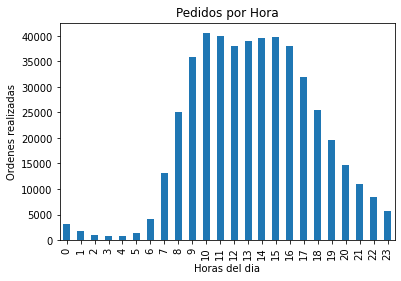

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [37]:
Pedidos_por_horas_dia = instacart_orders["order_hour_of_day"].value_counts().sort_index()
Pedidos_por_horas_dia.plot(kind="bar",
                          title= "Pedidos por Hora",
                          xlabel= "Horas del dia",
                          ylabel= "Ordenes realizadas") 
plt.show()

Pedidos_por_horas_dia

Entre las 10 Am y 11 Am es donde mas ordenes se ejecutan. siendo 10 Am la de mas alto impacto con 40578 ordenes realizadas. esto puede ser porque en estas horas se solicitan productos para realizar el almuerzos en los hogares.

### [A3] ¿Qué día de la semana compran víveres las personas?

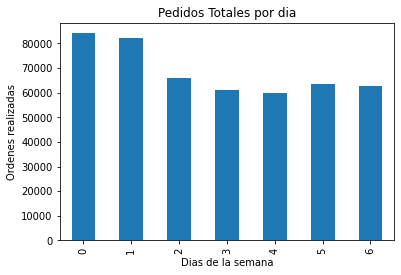

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

In [38]:
Compras_dias_semana=instacart_orders["order_dow"].value_counts().sort_index()
Compras_dias_semana.plot(kind="bar",
                          title= "Pedidos Totales por dia",
                          xlabel= "Dias de la semana",
                          ylabel= "Ordenes realizadas") 
plt.show()
Compras_dias_semana

El dia Domingo es donde mas se realizan compran viveres a la semana. con 84.090 solicitudes. esto es viable ya que este dia es cuando las familias mas estan en sus hogares y se aprovicionan para el consumo semanal de articulos. el Jueves es el dia donde menos despachos se realizan con 59.810 Envios

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

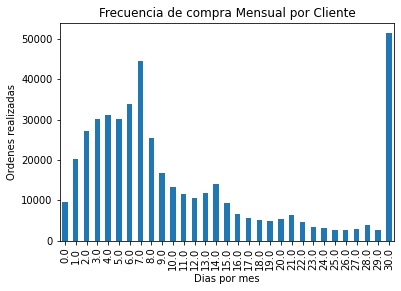

In [39]:
buyed=instacart_orders["days_since_prior_order"].value_counts().sort_index()
buyed.plot(kind="bar",
            title= "Frecuencia de compra Mensual por Cliente",
            xlabel= "Dias por mes",
            ylabel= "Ordenes realizadas")

plt.show()


Los clientes tienen una mayor iniciativa de generar sus compras cada 30 dias. es decir realizan las compras de productos en periodo mensual con mayor frecuencia. por otro lado la segunda mayor puntuacion es para clientes que realizan las compras con periodos semanales es decir cada 7 dias.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran analisis en la parte A :D
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
ventas_miercoles =instacart_orders[instacart_orders["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index()
ventas_sabado =instacart_orders[instacart_orders["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()

In [41]:
orders_mir_sab=pd.concat([ventas_miercoles,ventas_sabado],axis=1)
orders_mir_sab.columns=["order_miercoles","order_sabado"]
orders_mir_sab

,order_miercoles,order_sabado
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


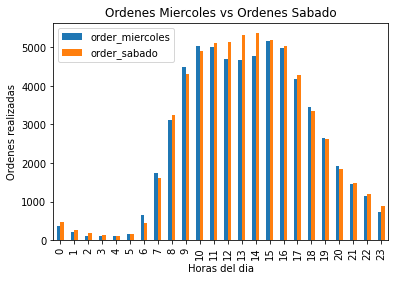

In [42]:
orders_mir_sab.plot(kind="bar",
            title= "Ordenes Miercoles vs Ordenes Sabado",
            xlabel= "Horas del dia",
            ylabel= "Ordenes realizadas")

plt.show()

El dia sabado entre 12 a 14 Horas hay una diferencia notoria con el dia Miercoles. esto se debe a que los dias sabados hay personas en sus hogares las cuales solicitan domicilio de comida o de productos para hacer sus respectivo almuerzo. mientras que los dias Miercoles la mayoria de ciudadanos estan en sus trabajos,

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buena gráfica y analisis!
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
pedidosxcliente=instacart_orders["user_id"].value_counts()
df_numeropedidoxcliente=pd.concat([pedidosxcliente],axis=1).value_counts()
df_numeropedidoxcliente

user_id
1          55357
2          36508
3          21547
4          13498
5           8777
6           6012
7           4240
8           3019
9           2152
10          1645
11          1308
12           947
13           703
14           512
15           437
16           263
17           184
18           121
19            85
20            52
22            23
21            22
23            19
24             3
25             1
26             1
28             1
dtype: int64

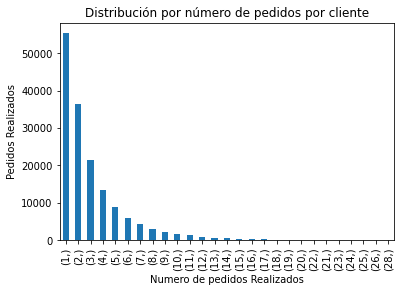

In [44]:
df_numeropedidoxcliente.plot(kind="bar",
            title= "Distribución por número de pedidos por cliente",
            xlabel= "Numero de pedidos Realizados",
            ylabel= "Pedidos Realizados")

plt.show()

En la siguiente grafica de barras observamos que la mayoria de clientes solo genera un pedido en la plataforma.  55357 clientes solo han generado 1 pedido en la aplicacion. lo cual es critico ya que no hay recompra en dichos clientes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La mayoria de los clientes a realizado pocas ordenes, bien observado!
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_polulares=order_products.merge(products,on= "product_id")
top_20=productos_polulares.groupby(["product_id","product_name"]).count().sort_values(["order_id"],ascending=False)

In [46]:
display(top_20.head(20))

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


El top 20 de productos mas populares es iniciado por codigo de producto 24852 el cual corresponde a Banana. podemos observar que los productos mas populares son Frutas y verduras.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
articulos=order_products.groupby("order_id")["product_id"].count()

In [48]:
grafico=articulos.value_counts().sort_index()

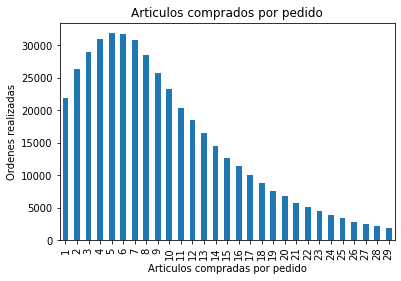

In [49]:
grafico[grafico.index<30].plot(kind="bar",
            title= "Articulos comprados por pedido",
            xlabel= "Articulos compradas por pedido",
            ylabel= "Ordenes realizadas")

plt.show()

La mayoria de clientes llevan entre 5 y 6 articulos por compra.se ve que la curva esponencial llega a su maximo en es 5 articulos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
product_reorder=order_products[order_products["reordered"]==1]

In [51]:
df=product_reorder.merge(products,on="product_id")

In [52]:
display(df.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,BAG OF ICE,37,1
1,761899,1560,2,1,BAG OF ICE,37,1
2,1388514,1560,8,1,BAG OF ICE,37,1
3,2629631,1560,1,1,BAG OF ICE,37,1
4,866921,1560,6,1,BAG OF ICE,37,1


In [53]:
top_20_product=df.groupby(["product_id","product_name"]).count().sort_values(["order_id"],ascending=False)
top_20_product.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,55763,55763,55763,55763,55763
13176,BAG OF ORGANIC BANANAS,44450,44450,44450,44450,44450
21137,ORGANIC STRAWBERRIES,28639,28639,28639,28639,28639
21903,ORGANIC BABY SPINACH,26233,26233,26233,26233,26233
47209,ORGANIC HASS AVOCADO,23629,23629,23629,23629,23629
47766,ORGANIC AVOCADO,18743,18743,18743,18743,18743
27845,ORGANIC WHOLE MILK,16251,16251,16251,16251,16251
47626,LARGE LEMON,15044,15044,15044,15044,15044
27966,ORGANIC RASPBERRIES,14748,14748,14748,14748,14748


Definitivamente la Bananas son el producto que mas se solicitan con frecuencia en los pedidos de los clientes. La banana con 55.763 reordenes es el producto mas top. observamos que los clientes de esta plataforma son muy saludables ya que los productos que mas reordenan son frutas, verduras y lacteos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
reorder_product=order_products.merge(products,on="product_id")

In [55]:
solicitud_Product=reorder_product.groupby("product_name")["reordered"].mean()

In [56]:
solicitud_Product.sort_values(ascending=False).reset_index().head(10)

,product_name,reordered
0,CHEDDAR CHEESEBURGER CRISPY BUTTERY CRUST SAND...,1.0
1,TUSCAN SOUP,1.0
2,PARSLEY FREEZE-DRIED HERBS,1.0
3,AGAVE SWEETENED SPELT PUFFED CAKES,1.0
4,AGAVE LEMONADE,1.0
5,PARMESAN & GARLIC KETTLE COOKED POTATO CHIPS,1.0
6,PARMA ROSA SAUCE MIX,1.0
7,TURKEY/CHICKEN/CHICKEN LIVER HEALTHY KITTEN CA...,1.0
8,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS,1.0
9,TURMERIC GINGER TEA ORGANIC,1.0


la siguiente tabla muestra el top 10 de productos que tienen el mayor indice de proporcion para ser pedidos reiteradamente. el Cheddar Chesseburger Crispy es el producto que mas se vuelve a pedir. puede ser que es un producto que esta a buen precio o que su calidad es muy buena. por eso los clientes lo solicitan frecuentemente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
reorder_client=order_products.merge(instacart_orders,on="order_id")

In [58]:
reorder_Product=reorder_client.groupby("user_id")["reordered"].mean()
reorder_Product.sort_values(ascending=False).reset_index().head(20)

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
5,96301,1.0
6,62312,1.0
7,48616,1.0
8,62316,1.0
9,191162,1.0


la siguiente tabla muestra el top 20 de clientes que realizan pedidos frecuentemenete y siempre eligen los mismos productos en sus compras. El cliente registrado con User_id 137587 es el de mayor similitud en sus compras.
con este dato podemos segmentar a estos clientes y ofrecer otros descuentos para otros productos y asi ellos se motiven ha hacer compra de otros productos diferentes a lo habitual.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
df_orders = order_products.merge(products)

In [60]:
df_orders[df_orders["add_to_cart_order"]==1]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,CHICKEN BREAST TENDERS BREADED,129,1
17,2201430,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
21,1036054,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
50,3008652,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
62,2946144,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,SENSITIVE NIGHT CREAM,73,11
4544977,1776450,21507,1,0,GLUTEN FREE ALL-PURPOSE RICE FLOUR BLEND,17,13
4544995,2333206,25467,1,0,MADAGASCAR PURE VANILLA,17,13
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [61]:
top20_articulos=df_orders.groupby(["product_id","product_name"]).count().sort_values(["add_to_cart_order"],ascending=False)
top20_articulos.head(20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


De nuevo las Bananas son el primer productos que las personas ponen en sus carritos de compra. en 66.050 solicitudes de compra . las bananas fueros las primeras en los carritos de compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo en la parte C!
</div>

### Conclusion general del proyecto:

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido
Podemos concluir que la plataforma Instacart cuenta con un muy buen volumen de pedidos a lo largo de la semana. que los dias Domingos es donde mas solicitudes se realizan y los dias Jueves es donde menos solicitudes se hacen, por otro lado entre las 10 Am y 2 pm es donde mas solicitudes se realizan a lo largo del dia. puede ser porque ha esta hora es la franja horaria del almuerzo.
los productos que mas ponen en los carritos de compra son las Bananas junto con frutas y verduras. el producto CHEDDAR CHEESEBURGER CRISPY BUTTERY es el producto que mas recompran los usuarios. puede ser por el buen precio o por su valor nutricional o calidad.
En cada pedido las usuarios compran entre 5 a 6 pedidos, siendo 5 el de mayor impacto. por otro lado el punto negativo es que no hay recompra en la aplicacion ya que 55.357 clientes solo generaron 1 pedido en la app.
El flujo de compra de las personas que son fieles a la aplicacion es mensual